# Exploring Penguin Data: A Story-Based EDA
This notebook explores the penguin dataset to uncover insights about penguin species, their physical characteristics, and behaviors across different islands.

## Import Libraries
We start by importing the necessary libraries for data analysis and visualization.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Load the Dataset
We load the penguin dataset and take a quick look at its structure.

In [8]:
df = pd.read_csv('penguins_lter.csv')
print(df.shape)
print(df.dtypes)
print(df.columns)
df.head()

(344, 17)
studyName               object
Sample Number            int64
Species                 object
Region                  object
Island                  object
Stage                   object
Individual ID           object
Clutch Completion       object
Date Egg                object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
Comments                object
dtype: object
Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')


,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


## Check for Missing Values
We check for missing values to understand the data quality and decide on cleaning steps.

In [10]:
df.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

## Clean the Data
We drop unnecessary columns and handle missing values to prepare the dataset for analysis.

In [ ]:
# Drop rows with missing values
df.drop('Comments', axis=1, inplace=True)
df = df.dropna()

## Save the Cleaned Data
We save the cleaned dataset for future use.

In [14]:
df.to_csv('penguins_lter_clean.csv', index=False)

## Reload the Cleaned Data
We reload the cleaned dataset to ensure it is ready for analysis.

In [ ]:
df = pd.read_csv("penguins_lter_clean.csv")

## Species Distribution
We visualize the distribution of penguin species in the dataset.

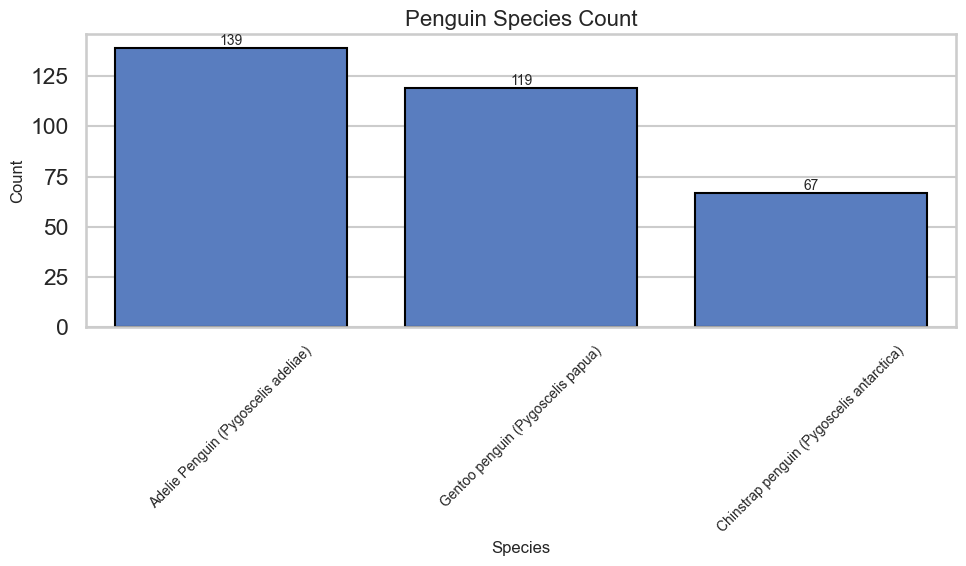

In [36]:
# Enhanced visualization of species count
species_count = df['Species'].value_counts().reset_index()
species_count.columns = ['Species', 'Count']
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Species', y='Count', data=species_count, dodge=False, edgecolor='black')
for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%d', label_type='edge', fontsize=10)
bar_plot.set_title('Penguin Species Count', fontsize=16)
bar_plot.set_xlabel('Species', fontsize=12)
bar_plot.set_ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

## Species Distribution Across Islands
We analyze how penguin species are distributed across different islands.

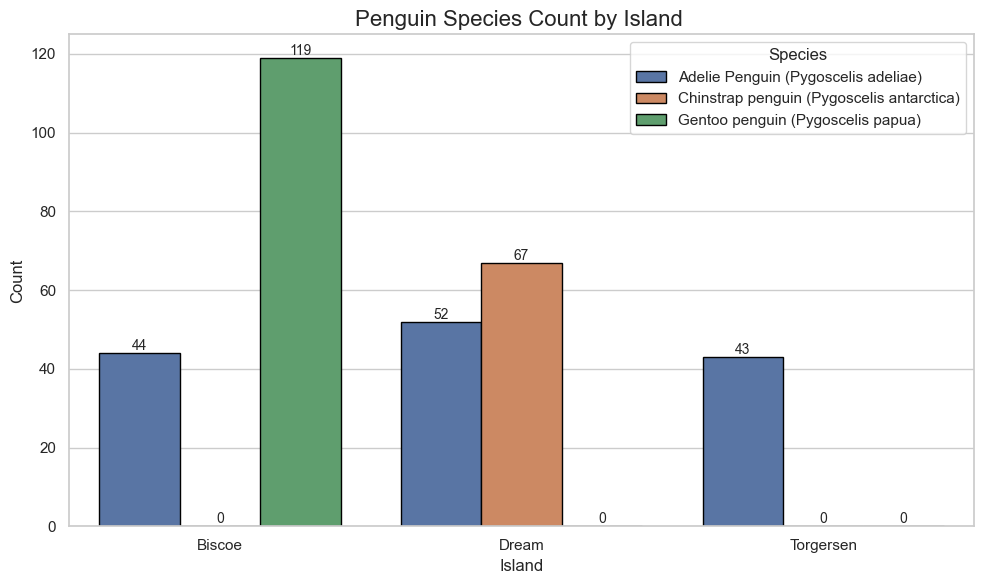

In [37]:
species_island_count = df.groupby(['Island', 'Species']).size().reset_index(name='Count')
all_islands = ['Biscoe', 'Dream', 'Torgersen']
all_species = df['Species'].unique()
full_index = pd.MultiIndex.from_product([all_islands, all_species], names=['Island', 'Species'])
species_island_count = species_island_count.set_index(['Island', 'Species']).reindex(full_index, fill_value=0).reset_index()

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
bar_plot = sns.barplot(x='Island', y='Count', hue='Species', data=species_island_count, dodge=True, edgecolor='black')
for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%d', label_type='edge', fontsize=10)
bar_plot.set_title('Penguin Species Count by Island ', fontsize=16)
bar_plot.set_xlabel('Island', fontsize=12)
bar_plot.set_ylabel('Count', fontsize=12)
plt.legend(title='Species', loc='upper right')
plt.tight_layout()
plt.show()

## Physical Features by Species and Island
We explore the physical features of penguins grouped by species and island.

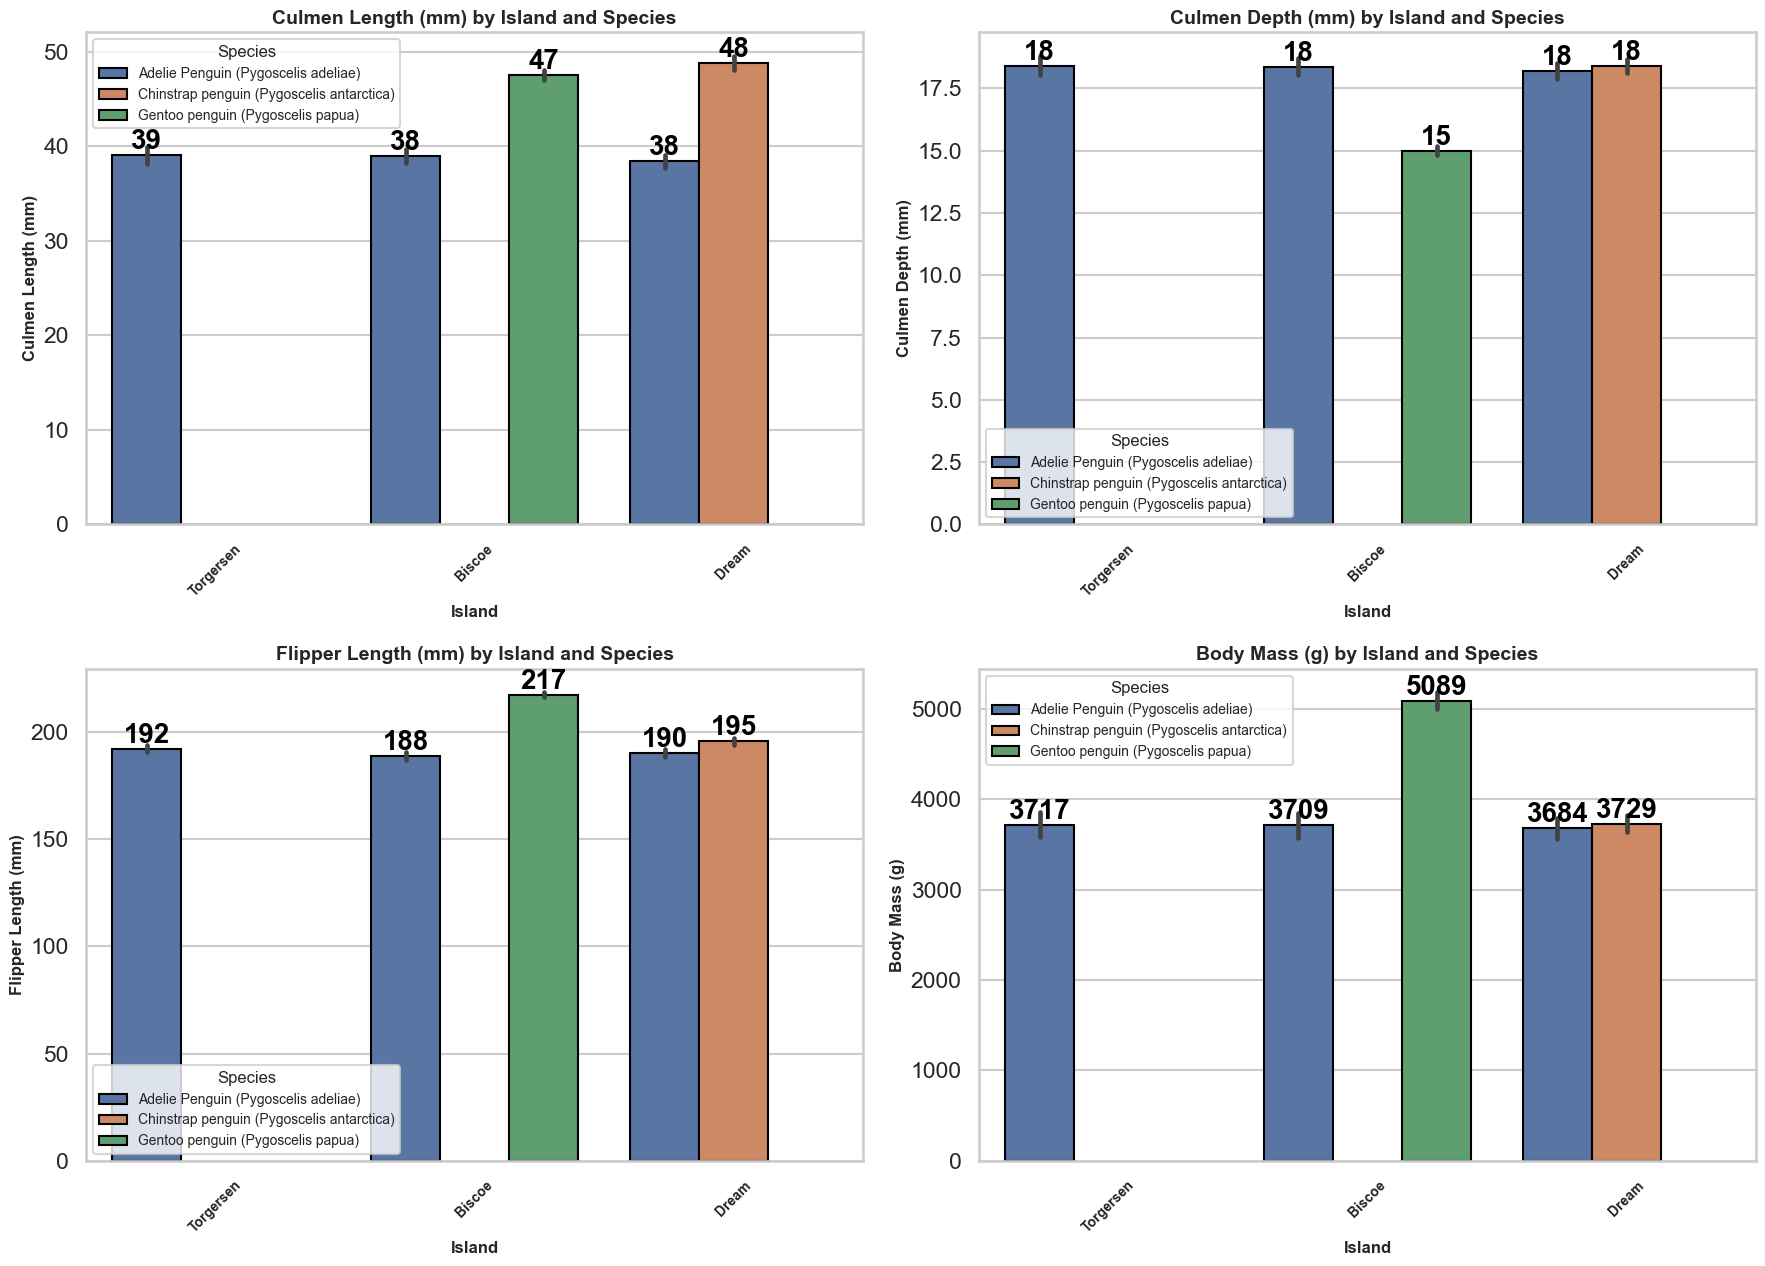

In [ ]:
features = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']
plt.figure(figsize=(18, 13))
sns.set(style="whitegrid", context="talk")
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    bar_plot = sns.barplot(x='Island', y=feature, hue='Species', data=df, dodge=True, edgecolor='black')
    for container in bar_plot.containers:
        bar_plot.bar_label(container, fmt='%.d', label_type='edge', fontsize=20, color='black', weight='bold')
    plt.title(f'{feature} by Island and Species', fontsize=14, weight='bold')
    plt.xlabel('Island', fontsize=12, weight='bold')
    plt.ylabel(feature, fontsize=12, weight='bold')
    plt.xticks(rotation=45, fontsize=10, weight='bold')
    plt.legend(title='Species', loc='best', fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()

## Physical Features by Gender and Species
We analyze the physical features of penguins grouped by gender and species.

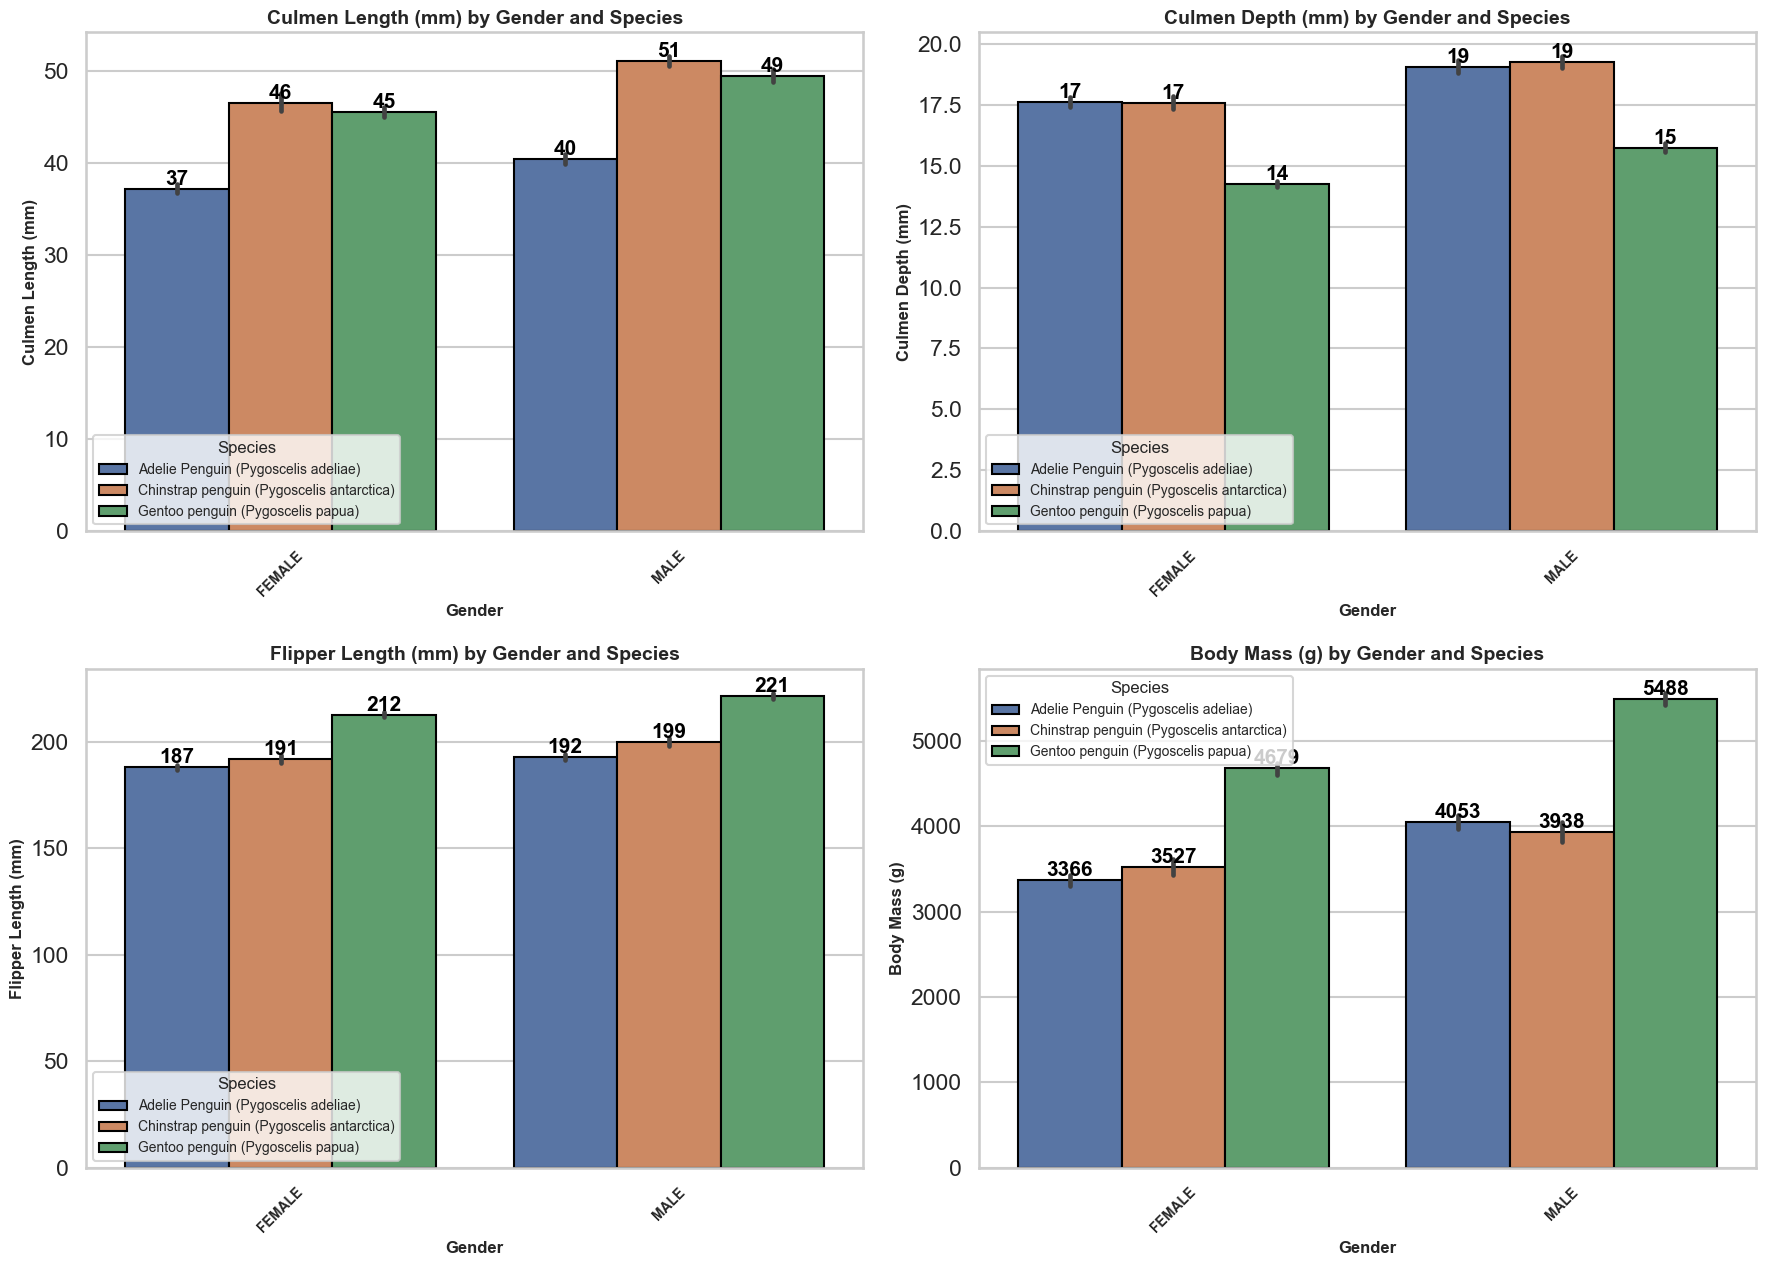

In [61]:
# Filter dataset to include only male and female penguins of the three species
df_filtered = df[df['Sex'].isin(['MALE', 'FEMALE'])]

# Grouped visualization of physical features by gender and species
features = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']
plt.figure(figsize=(18, 13))
sns.set(style="whitegrid", context="talk")
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    bar_plot = sns.barplot(x='Sex', y=feature, hue='Species', data=df_filtered, dodge=True, edgecolor='black')
    for container in bar_plot.containers:
        bar_plot.bar_label(container, fmt='%.d', label_type='edge', fontsize=15, color='black', weight='bold')
    plt.title(f'{feature} by Gender and Species', fontsize=14, weight='bold')
    plt.xlabel('Gender', fontsize=12, weight='bold')
    plt.ylabel(feature, fontsize=12, weight='bold')
    plt.xticks(rotation=45, fontsize=10, weight='bold')
    plt.legend(title='Species', loc='best', fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()

## Clutch Completion Across Islands
We examine the clutch completion percentages across islands for different penguin species.

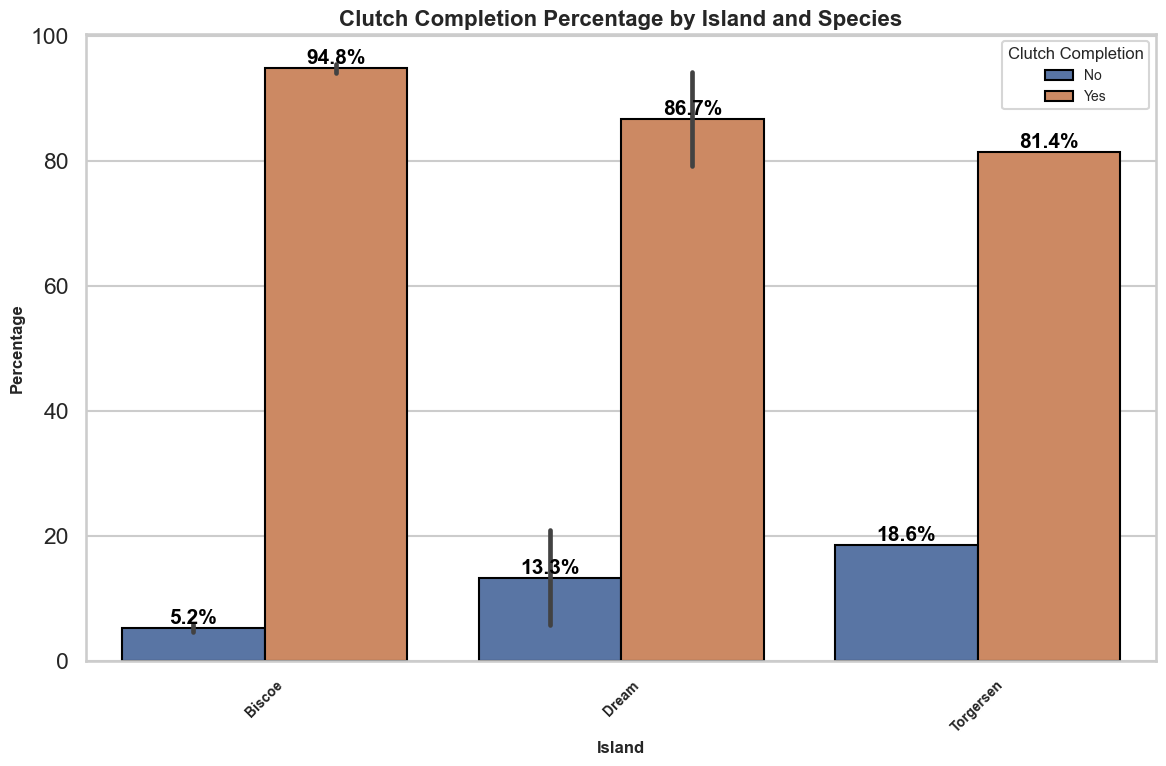

In [ ]:
clutch_count = df.groupby(['Species', 'Island', 'Clutch Completion']).size().reset_index(name='Count')
clutch_count['Percentage'] = clutch_count['Count'] / clutch_count.groupby(['Species', 'Island'])['Count'].transform('sum') * 100

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid", context="talk")
bar_plot = sns.barplot(x='Island', y='Percentage', hue='Clutch Completion', data=clutch_count, dodge=True, edgecolor='black')
for container in bar_plot.containers:
    bar_plot.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=15, color='black', weight='bold')
bar_plot.set_title('Clutch Completion Percentage by Island and Species', fontsize=16, weight='bold')
bar_plot.set_xlabel('Island', fontsize=12, weight='bold')
bar_plot.set_ylabel('Percentage', fontsize=12, weight='bold')
plt.xticks(rotation=45, fontsize=10, weight='bold')
plt.legend(title='Clutch Completion', loc='upper right', fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()

## Correlation Analysis
We analyze the correlation between numerical features to understand relationships in the dataset.

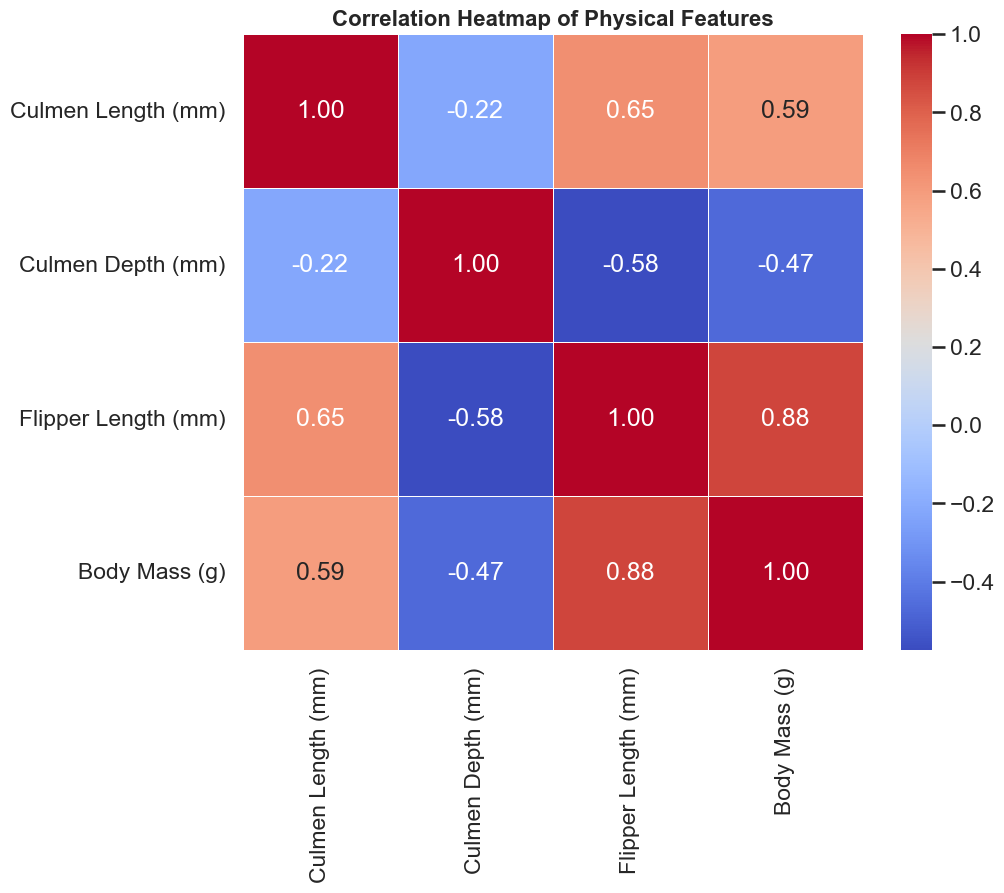

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Physical Features', fontsize=16, weight='bold')
plt.show()

## Distribution of Physical Features
We examine the distribution of physical features to identify patterns and outliers.

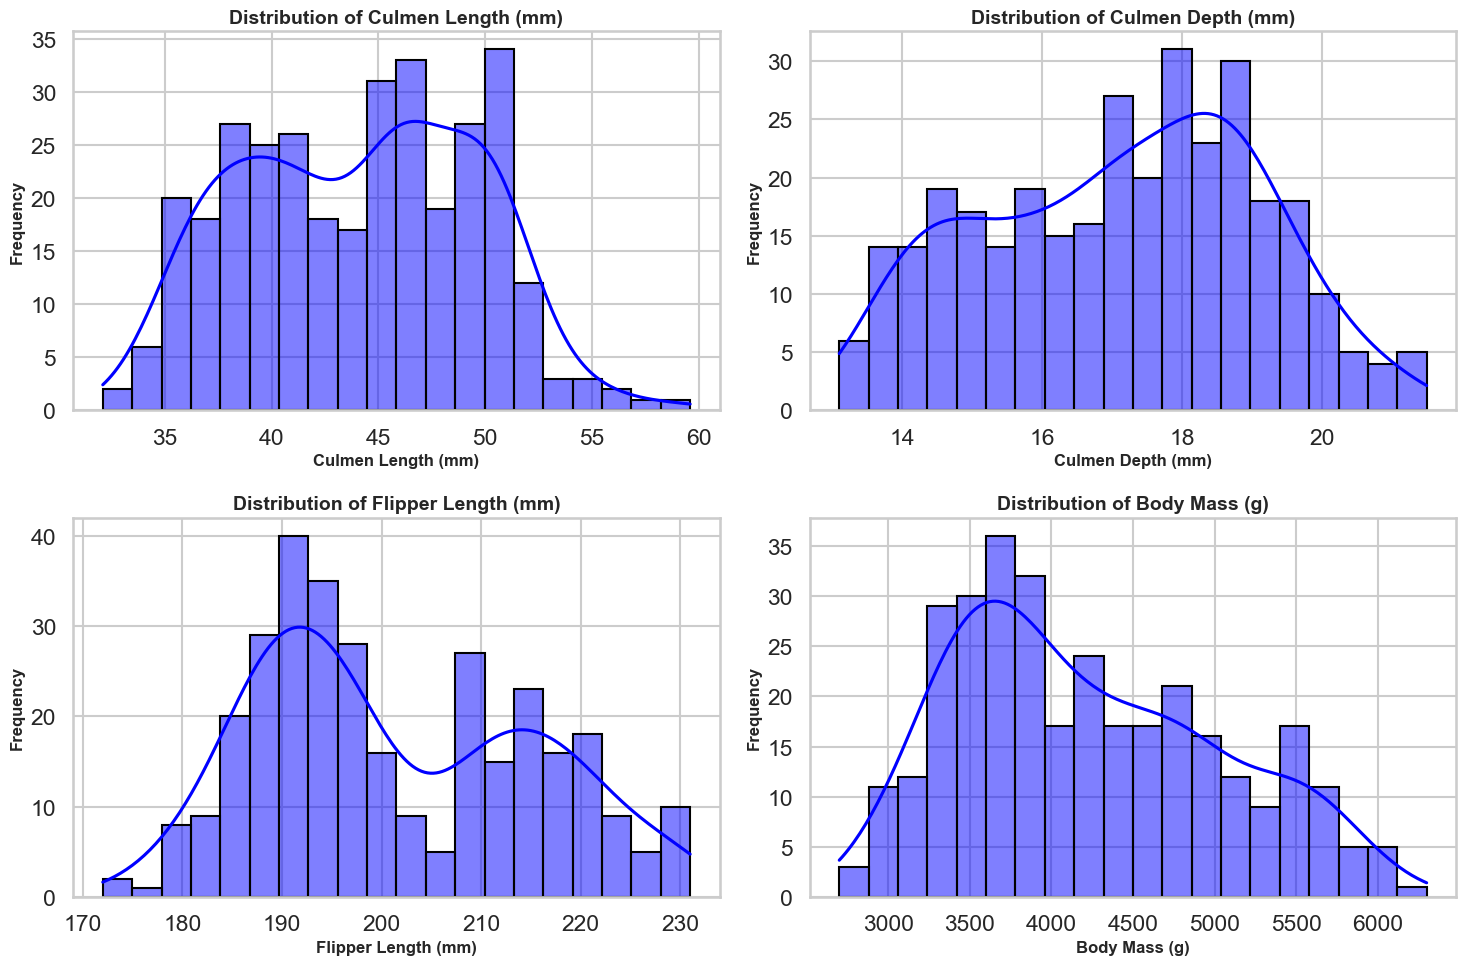

In [ ]:
features = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True, bins=20, color='blue', edgecolor='black')
    plt.title(f'Distribution of {feature}', fontsize=14, weight='bold')
    plt.xlabel(feature, fontsize=12, weight='bold')
    plt.ylabel('Frequency', fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

## Highlighting Gentoo Penguins' Superiority in Isotopic Composition

We use a scatter plot to compare `Delta 15 N (o/oo)` and `Delta 13 C (o/oo)` for each species, emphasizing the unique isotopic signature of Gentoo penguins.

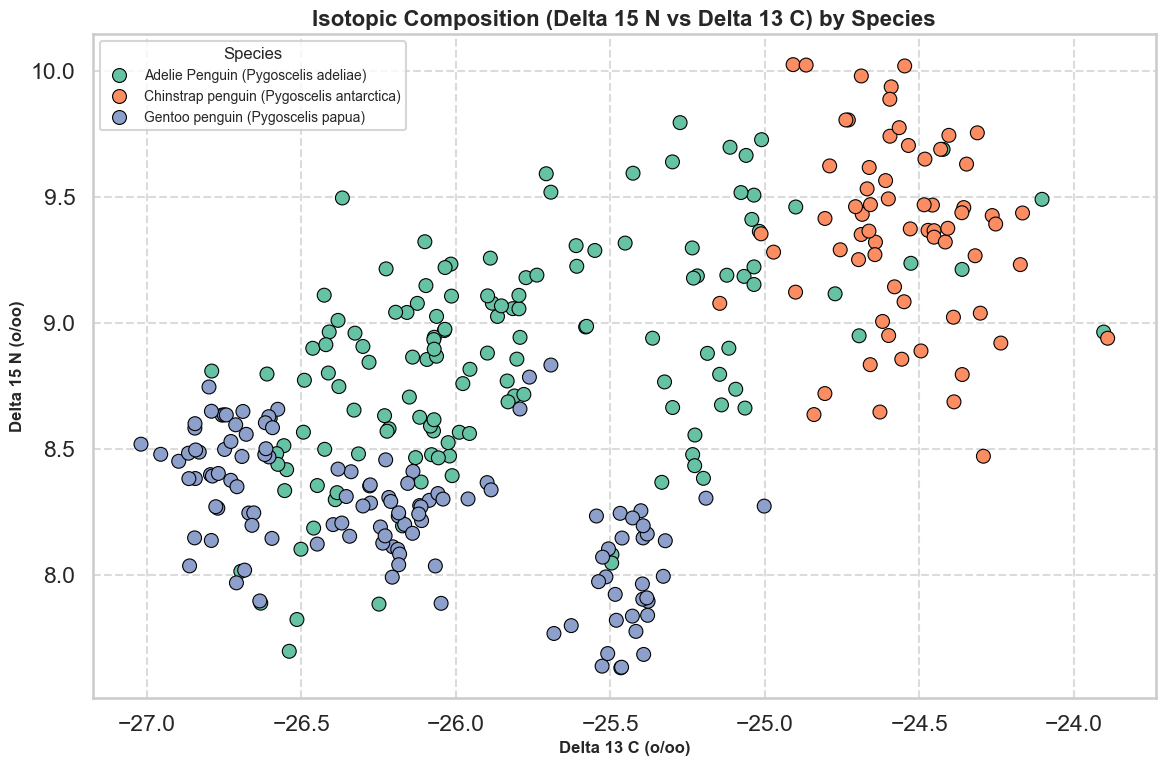

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Delta 13 C (o/oo)',
    y='Delta 15 N (o/oo)',
    hue='Species',
    data=df,
    palette='Set2',
    s=100,
    edgecolor='black'
)
plt.title('Isotopic Composition (Delta 15 N vs Delta 13 C) by Species', fontsize=16, weight='bold')
plt.xlabel('Delta 13 C (o/oo)', fontsize=12, weight='bold')
plt.ylabel('Delta 15 N (o/oo)', fontsize=12, weight='bold')
plt.legend(title='Species', loc='upper left', fontsize=10, title_fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Conclusion
Through this exploratory data analysis, we uncovered several insights about penguins:
- **Species Distribution**: Adelie penguins are the most common species in the dataset, followed by Gentoo and Chinstrap penguins.
- **Island Distribution**: Each species has a distinct preference for specific islands, with Gentoo penguins exclusively found on Biscoe Island.
- **Physical Features**: Gentoo penguins are generally larger in body mass and flipper length compared to Adelie and Chinstrap penguins.
- **Clutch Completion**: Clutch completion rates vary across islands and species, with Gentoo penguins showing the highest completion rates.
- **Correlations**: Body mass is strongly correlated with flipper length, indicating that larger penguins tend to have longer flippers.
- **Isotopic Composition**: Gentoo penguins exhibit a unique isotopic signature, with higher values of **Delta 15 N (o/oo)** and distinct **Delta 13 C (o/oo)** readings, further highlighting their ecological adaptability and superiority.

These insights provide a deeper understanding of penguin species and their ecological characteristics, with Gentoo penguins standing out as a remarkable species in terms of physical attributes, clutch success, and isotopic composition. This analysis paves the way for further research and conservation efforts.